In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import data
df = pd.read_csv(r"mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

There are 7 attributes with missing values which are age, primary streaming service, while working, instrumentalist, composer, exploratory, foreign language, BPM and Music effect

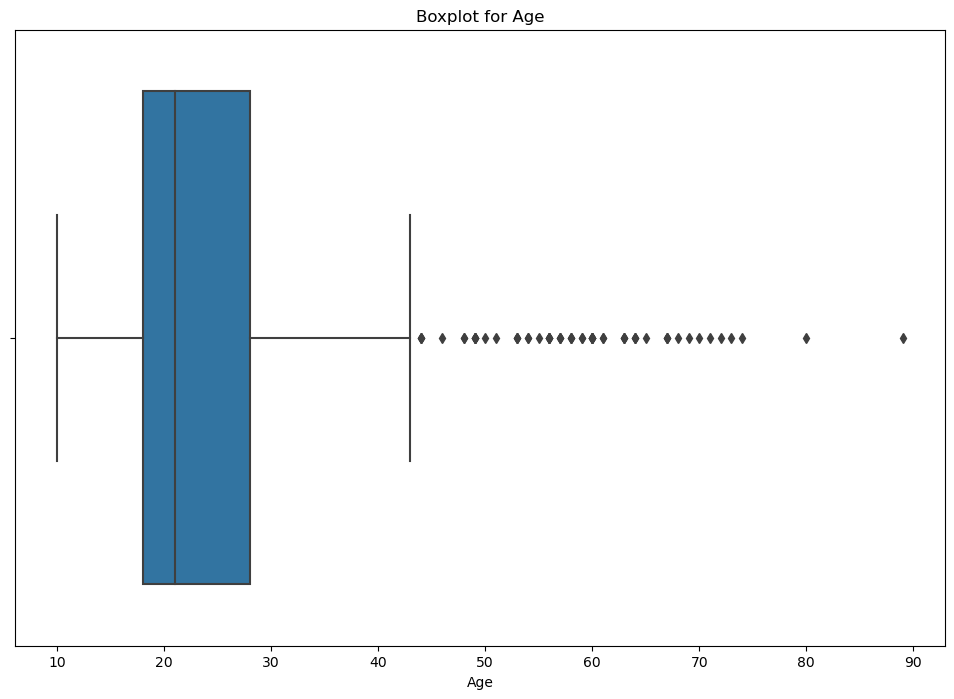

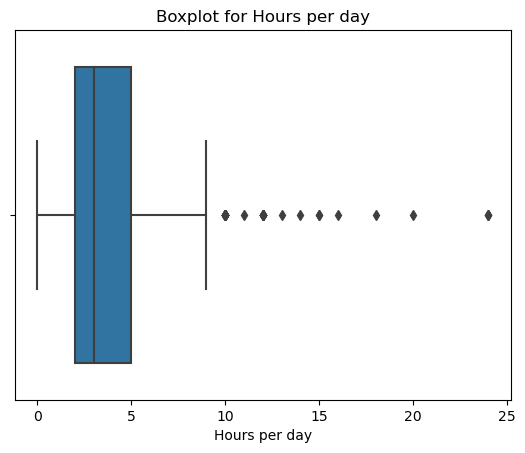

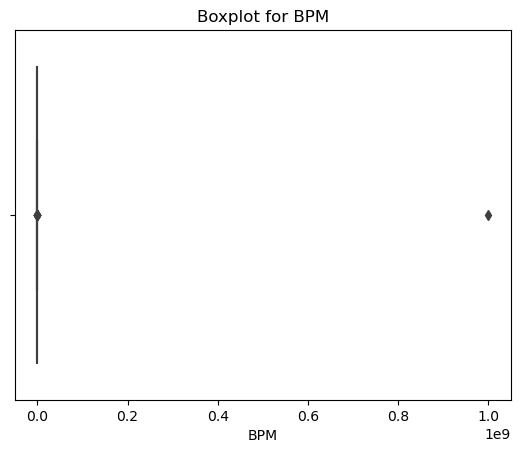

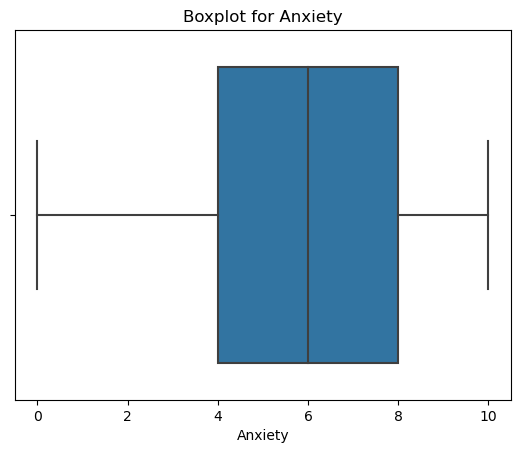

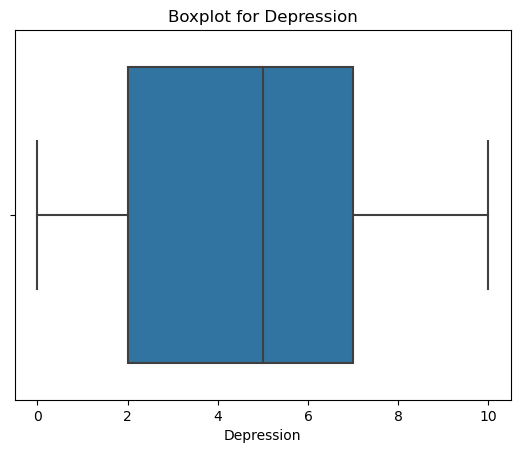

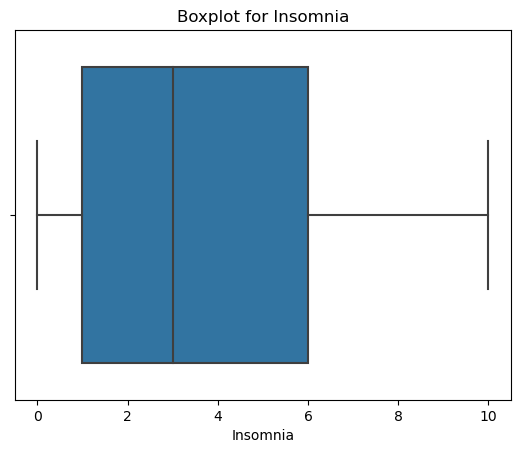

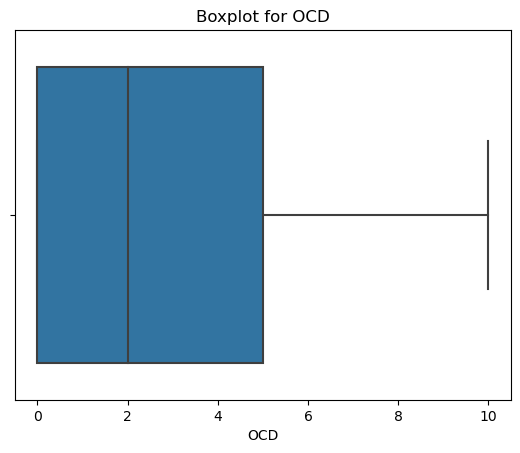

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
columns_of_interest = ["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]

# Create a boxplot for each selected column
plt.figure(figsize=(12, 8))
for column in columns_of_interest:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


Hours per day exist outlier around 24 hours(1day)which is not reasonable, therefore we need to deal with it.

BPM exist extreme value thus need to deal with it 

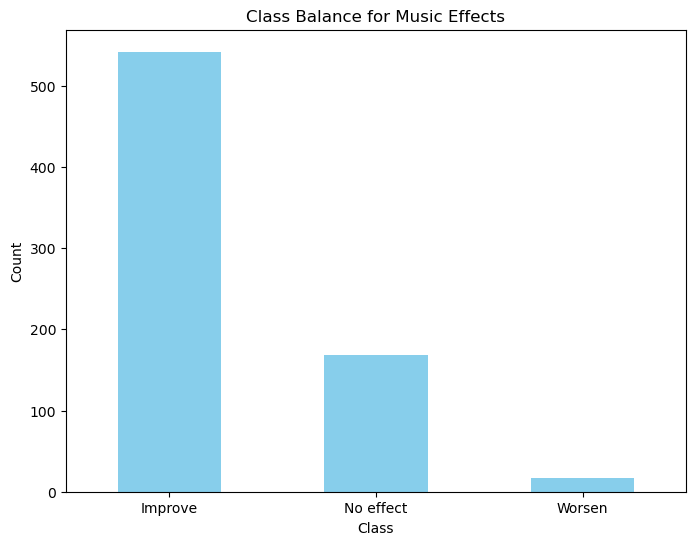

In [7]:
import matplotlib.pyplot as plt

# Assuming class_balance is the result of df['Music effects'].value_counts()
class_balance = df['Music effects'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
class_balance.plot(kind='bar', color='skyblue')
plt.title('Class Balance for Music Effects')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [8]:
class_balance = df['Music effects'].value_counts()
print(class_balance)


Improve      542
No effect    169
Worsen        17
Name: Music effects, dtype: int64


In [9]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


C:\Users\user\AppData\Local\Temp\ipykernel_29272\3687548621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BPM'])


<AxesSubplot: xlabel='BPM', ylabel='Density'>

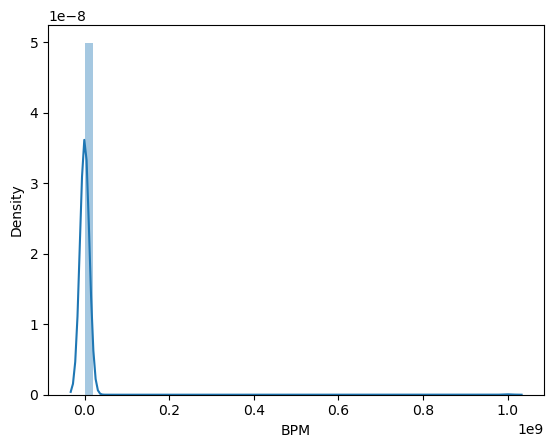

In [10]:
# Plotting Distribution Graph
sns.distplot(df['BPM'])

We found that there is an extreme large value(1.000000e+09) exist in BPM, thus we will check for it

# Handle extreme value and capping outliers

In [11]:
import pandas as pd

# Assuming 'BPM' is the column you want to analyze in the DataFrame 'df'
# Replace 'df' and 'BPM' with your actual DataFrame and column name

# Calculate the IQR (Interquartile Range)
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['BPM'] < lower_bound) | (df['BPM'] > upper_bound)]

# Display only the 'BPM' column of outliers
print("BPM column outliers:")
print(outliers['BPM'])


BPM column outliers:
248          220.0
339            0.0
372           20.0
429            4.0
524            0.0
567            8.0
568    999999999.0
610          220.0
639            0.0
644          624.0
662          218.0
Name: BPM, dtype: float64


In [12]:
import pandas as pd

# Assuming 'BPM' is the column you want to modify in the DataFrame 'df'
# Replace 'df' and 'BPM' with your actual DataFrame and column name

# Calculate the median of the 'BPM' column
median_bpm = df['BPM'].median()

# Replace extreme values with the median
df['BPM'] = df['BPM'].apply(lambda x: median_bpm if x == 999999999 else x)

# Calculate the IQR (Interquartile Range) after the initial replacement
Q1 = df['BPM'].quantile(0.25)
Q3 = df['BPM'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping to remaining outliers
df['BPM'] = df['BPM'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

In [13]:
import pandas as pd
# Calculate the IQR (Interquartile Range)
Q1 = df['Hours per day'].quantile(0.25)
Q3 = df['Hours per day'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Hours per day'] < lower_bound) | (df['Hours per day'] > upper_bound)]

# Display only the 'hours_per_day' column of outliers
print("Hours per day column outliers:")
print(outliers['Hours per day'])


Hours per day column outliers:
17     12.0
18     24.0
26     12.0
53     12.0
77     10.0
95     10.0
125    10.0
142    10.0
164    10.0
223    12.0
257    10.0
280    10.0
290    20.0
320    10.0
336    10.0
341    10.0
347    16.0
357    10.0
359    15.0
366    24.0
407    14.0
417    12.0
420    10.0
426    13.0
464    10.0
465    10.0
466    10.0
485    15.0
586    10.0
587    10.0
589    10.0
598    12.0
611    12.0
638    10.0
655    12.0
659    12.0
672    11.0
673    10.0
695    24.0
726    18.0
Name: Hours per day, dtype: float64


In [14]:
import pandas as pd
# Calculate the median of the 'hours_per_day' column
median_hours_per_day = df['Hours per day'].median()

# Replace extreme values with the median
df['Hours per day'] = df['Hours per day'].apply(lambda x: median_hours_per_day if x == 24 else x)

# Apply capping to remaining outliers
df['Hours per day'] = df['Hours per day'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


In [15]:
import pandas as pd
# Calculate the IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping to remaining outliers
df['Age'] = df['Age'].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


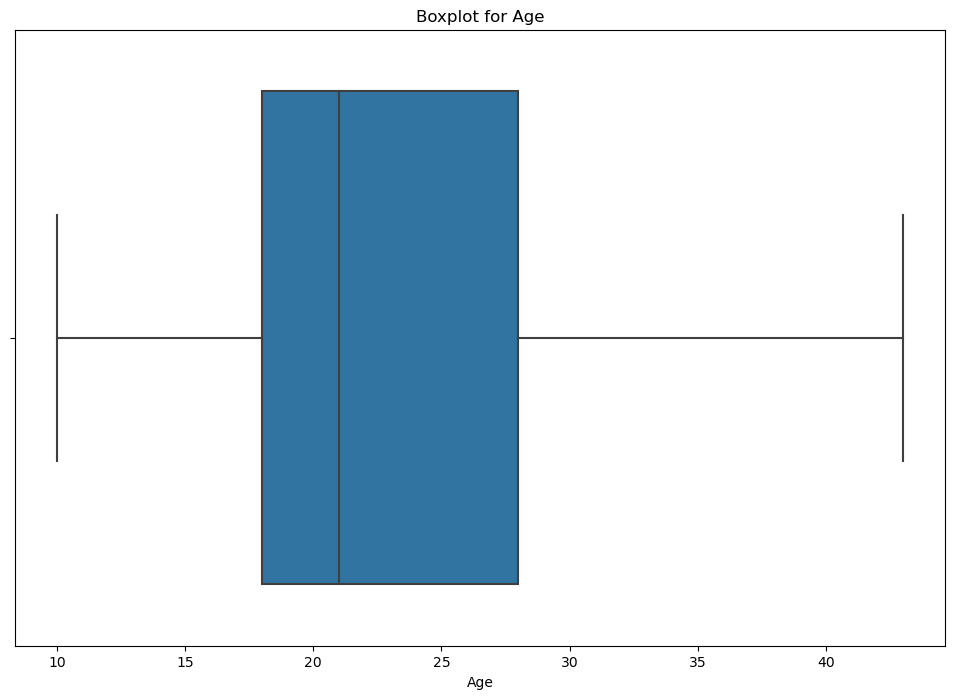

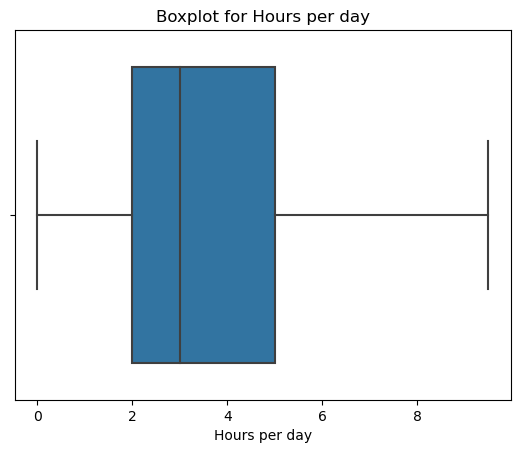

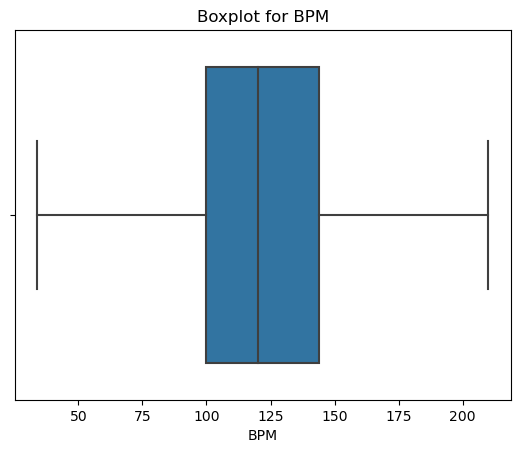

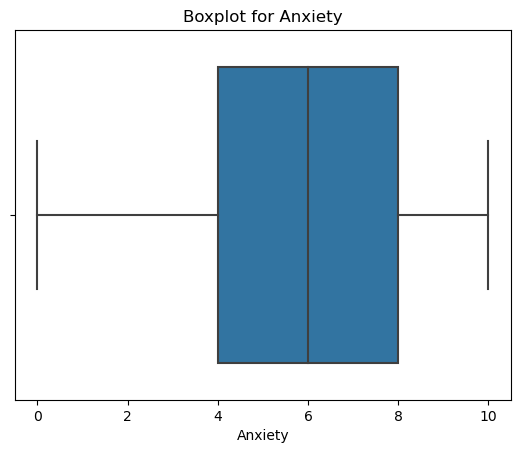

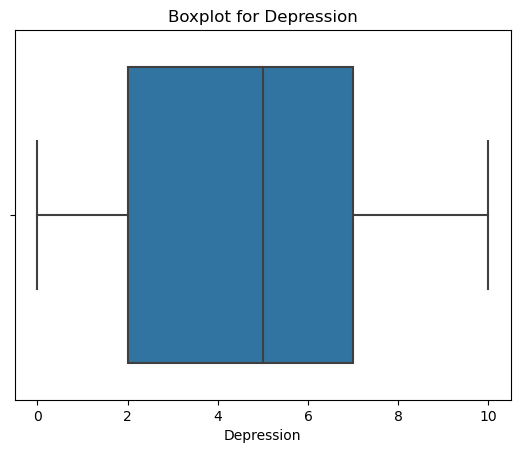

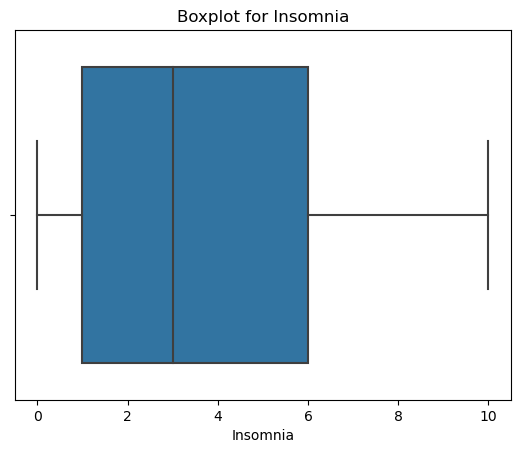

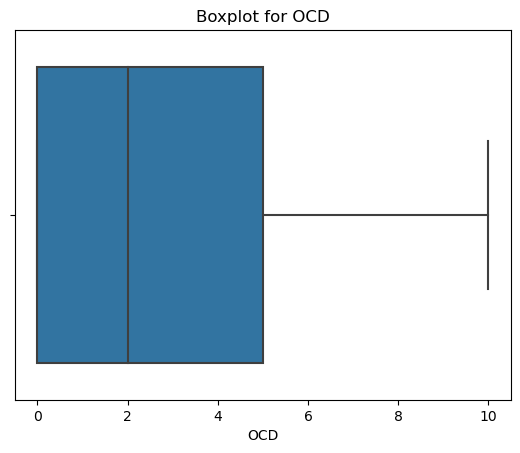

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
columns_of_interest = ["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]

# Create a boxplot for each selected column
plt.figure(figsize=(12, 8))
for column in columns_of_interest:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_29272\3687548621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BPM'])


<AxesSubplot: xlabel='BPM', ylabel='Density'>

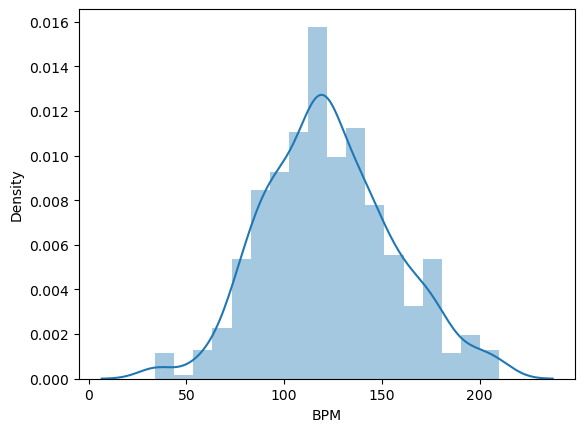

In [17]:
# Plotting Distribution Graph
sns.distplot(df['BPM'])

In [18]:
df = df.drop(["Timestamp","Permissions"],axis=1)

In [19]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_29272\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.112788,0.002936,-0.142272,-0.071778,0.033668,-0.110503
Hours per day,-0.112788,1.000000,0.027932,0.080179,0.141736,0.153389,0.136029
BPM,0.002936,0.027932,1.000000,0.027437,0.034155,0.037452,-0.026850
Anxiety,-0.142272,0.080179,0.027437,1.000000,0.519969,0.292669,0.348350
Depression,-0.071778,0.141736,0.034155,0.519969,1.000000,0.378996,0.196988
Insomnia,0.033668,0.153389,0.037452,0.292669,0.378996,1.000000,0.226354
OCD,-0.110503,0.136029,-0.026850,0.348350,0.196988,0.226354,1.000000


In [20]:
df.all

<bound method NDFrame._add_numeric_operations.<locals>.all of       Age Primary streaming service  Hours per day While working  \
0    18.0                   Spotify            3.0           Yes   
1    43.0                   Pandora            1.5           Yes   
2    18.0                   Spotify            4.0            No   
3    43.0             YouTube Music            2.5           Yes   
4    18.0                   Spotify            4.0           Yes   
..    ...                       ...            ...           ...   
731  17.0                   Spotify            2.0           Yes   
732  18.0                   Spotify            1.0           Yes   
733  19.0   Other streaming service            6.0           Yes   
734  19.0                   Spotify            5.0           Yes   
735  29.0             YouTube Music            2.0           Yes   

    Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
0               Yes      Yes             

# Imputation

In [21]:
#fill with mode since categorical data type
df['Primary streaming service'] = df['Primary streaming service'].fillna(df['Primary streaming service'].mode()[0])
df['While working'] = df['While working'].fillna(df['While working'].mode()[0])
df['Instrumentalist'] = df['Instrumentalist'].fillna(df['Instrumentalist'].mode()[0])
df['Composer'] = df['Composer'].fillna(df['Composer'].mode()[0])
df['Foreign languages'] = df['Foreign languages'].fillna(df['Foreign languages'].mode()[0])
df['Music effects'] = df['Music effects'].fillna(df['Music effects'].mode()[0])

In [22]:
from sklearn.impute import KNNImputer,SimpleImputer
impute = KNNImputer()
simple_impute = SimpleImputer(missing_values='NAN', strategy='mean')
df['Age'] = impute.fit_transform(df['Age'].values.reshape(-1,1))
df['BPM'] = impute.fit_transform(df['BPM'].values.reshape(-1,1))

In [23]:
df.isnull().sum()

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

# Encode

In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame and 'Music effects' is the column with categorical labels
le = LabelEncoder()
df['Music effects'] = le.fit_transform(df['Music effects'])

# Access the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Label Mapping:")
print(label_mapping)



original_labels = le.inverse_transform([0, 1, 2])
print("Original Labels:")
print(original_labels)

Label Mapping:
{'Improve': 0, 'No effect': 1, 'Worsen': 2}
Original Labels:
['Improve' 'No effect' 'Worsen']


In [25]:
#pip install category_encoders

In [26]:
#pip install lazypredict

In [27]:
#pip install catboost

# Scaling( not sure need or not)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
numerical_process = Pipeline(
    steps = [('scaler',StandardScaler())]
)

In [30]:
lr = LabelEncoder()

In [31]:
categorical_process_1 = Pipeline(
    steps = [('lr',ce.TargetEncoder()),
             ('scaler',StandardScaler())]
    
)

In [32]:
categorical_process_2 = Pipeline(
    steps = [('lr',OneHotEncoder(sparse=False)),
             ('scaler',StandardScaler())]
    
)

In [33]:
X = df.drop(['Music effects'], axis=1)
y = df['Music effects']


In [34]:
#Target encoder
processor_1 = ColumnTransformer(
    [('Categorical_encoding',categorical_process_1,X.select_dtypes(include="object").columns),
    ('numerical_encoding',numerical_process,X.select_dtypes(exclude="object").columns)]

)

In [35]:
#One hot encoder
processor_2 = ColumnTransformer(
    [('Categorical_encoding',categorical_process_2,X.select_dtypes(include="object").columns),
    ('numerical_encoding',numerical_process,X.select_dtypes(exclude="object").columns)]

)

In [36]:
X.select_dtypes(include="object").columns

Index(['Primary streaming service', 'While working', 'Instrumentalist',
       'Composer', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]'],
      dtype='object')

In [37]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [39]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.39it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 515, number of used features: 86
[LightGBM] [Info] Start training from score -0.296132
[LightGBM] [Info] Start training from score -1.490577
[LightGBM] [Info] Start training from score -3.471578
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import time

# Define your classifiers
ada_model = AdaBoostClassifier()
ridge_model = RidgeClassifier()
logreg_model = LogisticRegression()
lda_model = LinearDiscriminantAnalysis()
svc_model = LinearSVC()

# Create pipelines for each model with different encoders
ada_pipeline = Pipeline([
    ('preprocessor', processor_1),
    ('model', ada_model)
])

ridge_pipeline = Pipeline([
    ('preprocessor', processor_1),
    ('model', ridge_model)
])

logreg_pipeline = Pipeline([
    ('preprocessor', processor_2),
    ('model', logreg_model)
])

lda_pipeline = Pipeline([
    ('preprocessor', processor_2),
    ('model', lda_model)
])

svc_pipeline = Pipeline([
    ('preprocessor', processor_2),
    ('model', svc_model)
])

# List of pipelines
pipelines = [ada_pipeline, ridge_pipeline, logreg_pipeline, lda_pipeline, svc_pipeline]

# Split your data into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train and evaluate each model using the pipeline
for pipeline in pipelines:
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Specify 'average' parameter
    
    model_name = pipeline.named_steps['model'].__class__.__name__
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}, F1-Score: {f1:.2f}, Time Taken: {end_time - start_time:.2f} seconds\n")
    
    # Print classification report for more details
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


AdaBoostClassifier:
Accuracy: 0.71, F1-Score: 0.70, Time Taken: 0.29 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       167
           1       0.40      0.36      0.38        53
           2       0.00      0.00      0.00         1

    accuracy                           0.71       221
   macro avg       0.40      0.39      0.40       221
weighted avg       0.70      0.71      0.70       221



RidgeClassifier:
Accuracy: 0.76, F1-Score: 0.70, Time Taken: 0.17 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       167
           1       0.60      0.11      0.19        53
           2       0.00      0.00      0.00         1

    accuracy                           0.76       221
   macro avg       0.46      0.36      0.35       221
weighted avg       0.73      0.76      0.70       221



LogisticRegression:
Accuracy: 0.71,

In [41]:
df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.00,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,156.00,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.00,0.00,1.00,0.00,0
1,43.00,Pandora,1.50,Yes,No,No,Rock,Yes,No,119.00,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.00,2.00,2.00,1.00,0
2,18.00,Spotify,4.00,No,No,No,Video game music,No,Yes,132.00,...,Rarely,Never,Rarely,Rarely,Very frequently,7.00,7.00,10.00,2.00,1
3,43.00,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,84.00,...,Sometimes,Sometimes,Never,Never,Never,9.00,7.00,3.00,3.00,0
4,18.00,Spotify,4.00,Yes,No,No,R&B,Yes,No,107.00,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.00,2.00,5.00,9.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.00,Spotify,2.00,Yes,Yes,No,Rock,Yes,Yes,120.00,...,Very frequently,Never,Rarely,Very frequently,Never,7.00,6.00,0.00,9.00,0
732,18.00,Spotify,1.00,Yes,Yes,No,Pop,Yes,Yes,160.00,...,Very frequently,Never,Never,Sometimes,Sometimes,3.00,2.00,2.00,5.00,0
733,19.00,Other streaming service,6.00,Yes,No,Yes,Rap,Yes,No,120.00,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.00,2.00,2.00,2.00,0
734,19.00,Spotify,5.00,Yes,Yes,No,Classical,No,No,170.00,...,Never,Never,Never,Never,Sometimes,2.00,3.00,2.00,1.00,0


In [42]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual


# Define a function to filter and display data
def filter_data(primary_service, fav_genre):
    filtered_data = df[(df['Primary streaming service'] == primary_service) & (df['Fav genre'] == fav_genre)]
    display(filtered_data)

# Create interactive widgets
primary_service_dropdown = widgets.Dropdown(options=df['Primary streaming service'].unique(),
                                           value='Spotify', description='Primary Service:')
fav_genre_dropdown = widgets.Dropdown(options=df['Fav genre'].unique(), value='Rock', description='Favorite Genre:')

# Use interact to make the widgets interactive
interact(filter_data, primary_service=primary_service_dropdown, fav_genre=fav_genre_dropdown);

# If you want a button to trigger the interaction manually, you can use interact_manual
# interact_manual(filter_data, primary_service=primary_service_dropdown, fav_genre=fav_genre_dropdown);


interactive(children=(Dropdown(description='Primary Service:', options=('Spotify', 'Pandora', 'YouTube Music',…

In [44]:
# Mapping for categorical variables
service_mapping = {"Spotify": 0, "Pandora": 1, "YouTube Music": 2, "Apple Music": 3, "Other streaming service": 4, "I do not use a streaming service.": 5}
binary_mapping = {"Yes": 1, "No": 0}
genre_mapping = {"Classical": 0, "Country": 1, "EDM": 2, "Folk": 3, "Gospel": 4, "Hip hop": 5, "Jazz": 6, "K pop": 7,
                 "Latin": 8, "Lofi": 9, "Metal": 10, "Pop": 11, "R&B": 12, "Rap": 13, "Rock": 14, "Video game music": 15}
frequency_mapping = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}

# Mapping for specific columns
column_mappings = {
    "Primary streaming service": service_mapping,
    "While working": binary_mapping,
    "Instrumentalist": binary_mapping,
    "Composer": binary_mapping,
    "Exploratory": binary_mapping,
    "Foreign languages": binary_mapping,
    "Fav genre": genre_mapping,
    "Frequency [Classical]": frequency_mapping,
    "Frequency [Country]": frequency_mapping,
    "Frequency [EDM]": frequency_mapping,
    "Frequency [Folk]": frequency_mapping,
    "Frequency [Gospel]": frequency_mapping,
    "Frequency [Hip hop]": frequency_mapping,
    "Frequency [Jazz]": frequency_mapping,
    "Frequency [K pop]": frequency_mapping,
    "Frequency [Latin]": frequency_mapping,
    "Frequency [Lofi]": frequency_mapping,
    "Frequency [Metal]": frequency_mapping,
    "Frequency [Pop]": frequency_mapping,
    "Frequency [R&B]": frequency_mapping,
    "Frequency [Rap]": frequency_mapping,
    "Frequency [Rock]": frequency_mapping,
    "Frequency [Video game music]": frequency_mapping,
}

# Apply mappings to the dataset
df = df.replace(column_mappings)

In [46]:
# Save the cleaned data to a CSV file
df.to_csv('mxmh_survey_results_cleaned_data.csv', index=False)